In [134]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [135]:
df = pd.read_csv('bank.csv')

In [136]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [137]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [138]:
df.drop([ 'job','marital','education','default', 'housing',
'loan', 'contact', 'month', 'poutcome','pdays',] ,axis=1 , inplace=True)

In [139]:
df['deposit'] = df.deposit.map({'yes':0, 'no':1})

In [140]:
data_x = df.drop('balance', axis='columns')
data_y = df.deposit

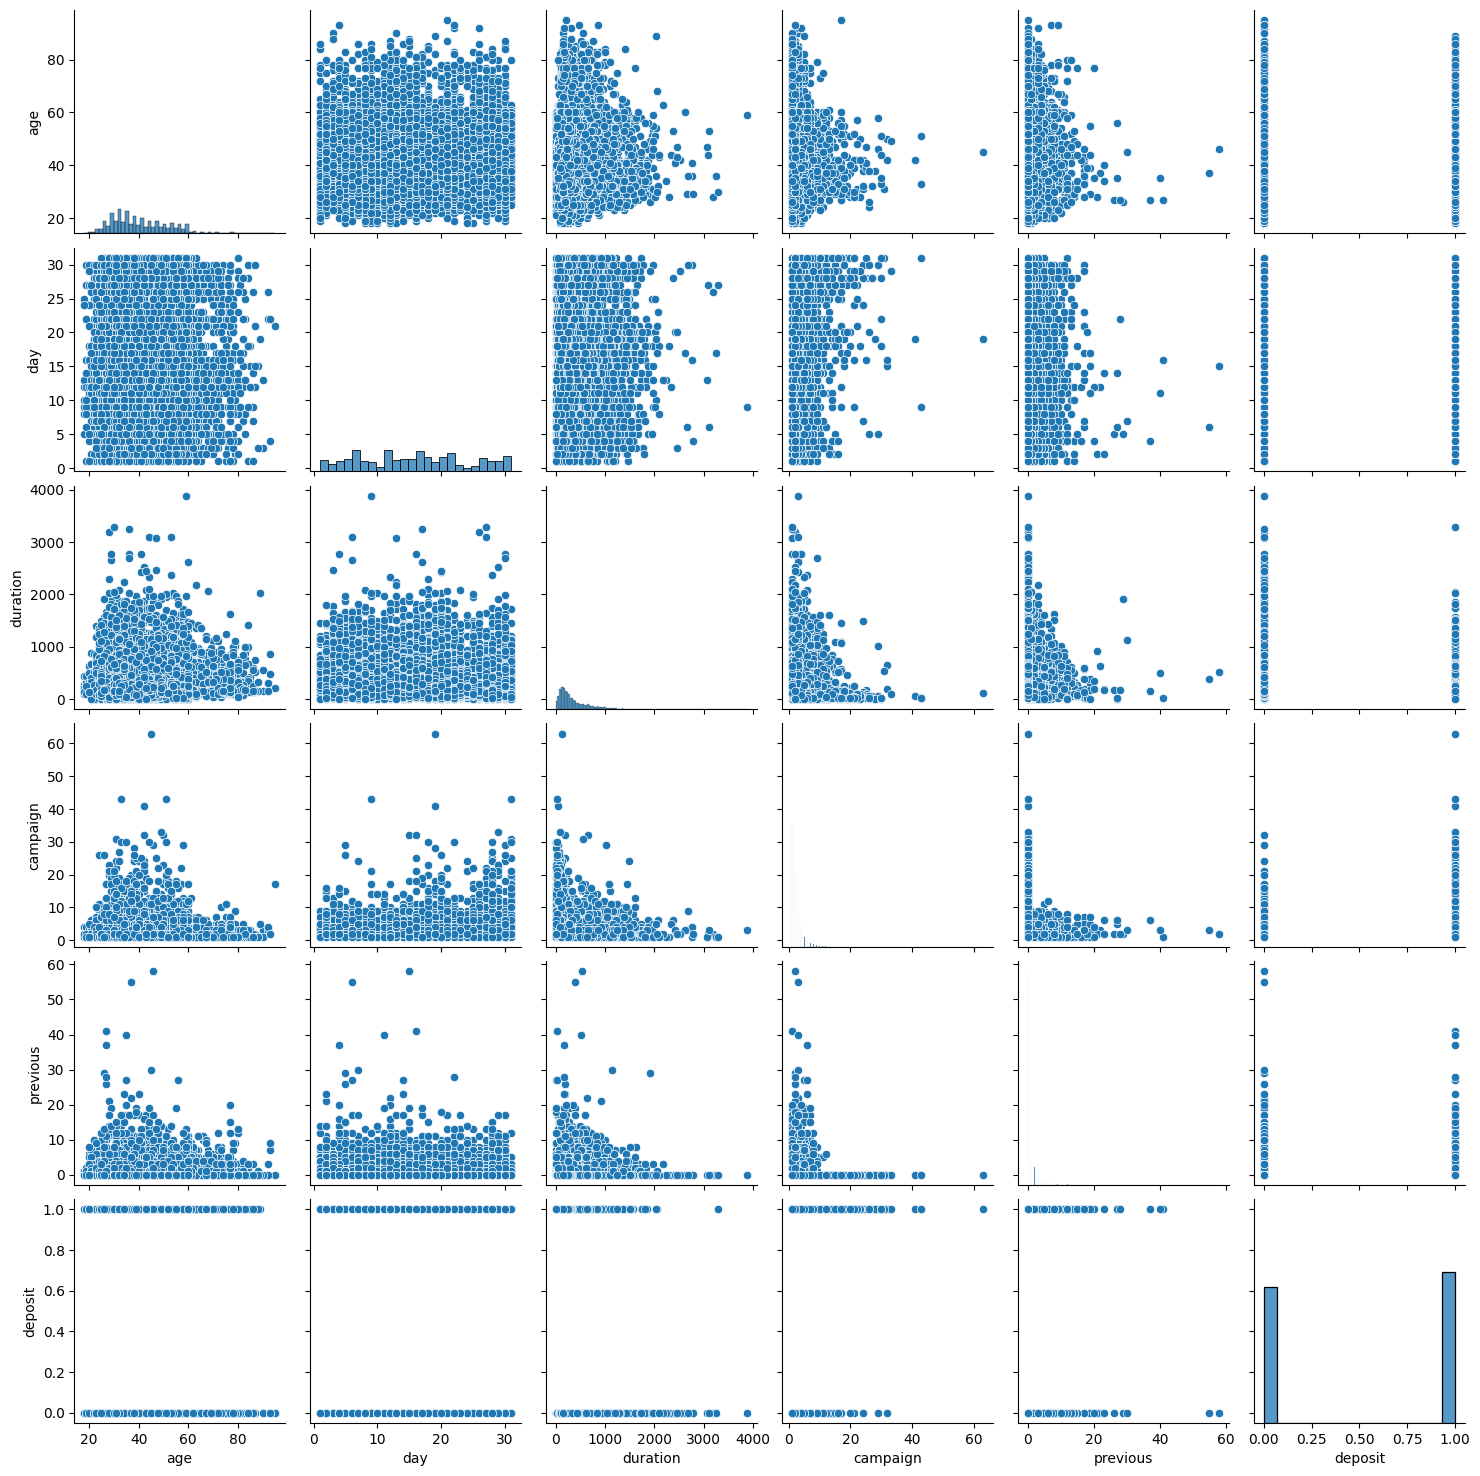

In [141]:
sns.pairplot(data_x) 

In [142]:
data_x

,age,day,duration,campaign,previous,deposit
0,59,5,1042,1,0,0
1,56,5,1467,1,0,0
2,41,5,1389,1,0,0
3,55,5,579,1,0,0
4,54,5,673,2,0,0
...,...,...,...,...,...,...
11157,33,20,257,1,0,1
11158,39,16,83,4,0,1
11159,32,19,156,2,0,1
11160,43,8,9,2,5,1


In [143]:
forest = RandomForestClassifier()

In [144]:
forest.fit(data_x, data_y)

RandomForestClassifier()

In [145]:
print(f'El score del modelo es: {round(forest.score(data_x, data_y), 4) *100}%')

El score del modelo es: 100.0%


In [146]:
result = ['se suscribio','no se suscribio']
age = 60 
balance = 1000 
day = 5  
duration = 1042  
campaign = 1  
previous = 0  
deposit = 0  

In [147]:
def classify_bank(model, age, balance, day, duration, campaign, previous, deposit):
    predicted = model.predict([[age, balance, day, duration, campaign, previous]])
    print("Para una persona con las siguientes características:")
    print(f"Edad: {age}, Saldo: {balance}, Día: {day}, Duración: {duration}, Campaña: {campaign}, Previous: {previous}, Deposito: {result[deposit]}") 


In [148]:
classify_bank(forest, age, balance, day, duration, campaign, previous, deposit)

Para una persona con las siguientes características:
Edad: 60, Saldo: 1000, Día: 5, Duración: 1042, Campaña: 1, Previous: 0, Deposito: se suscribio


c:\Users\PERSONAL\Desktop\6to semestre Gustavo\Repositorio Algoritmica\algoritmica-2023-2\gustavo\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
